In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
# filter for the job titles and country
df_CA = df[(df['job_country'] == 'Canada')].dropna(subset=['salary_year_avg'])

In [9]:
job_titles = df_CA['job_title_short'].value_counts().index[:6].tolist()

# filter the df for the top 6 job titles
df_CA_top6 = df_CA[df_CA['job_title_short'].isin(job_titles)]

# order the job titles by median salary
job_order = df_CA_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

job_titles

['Data Engineer',
 'Senior Data Engineer',
 'Data Scientist',
 'Machine Learning Engineer',
 'Software Engineer',
 'Data Analyst']

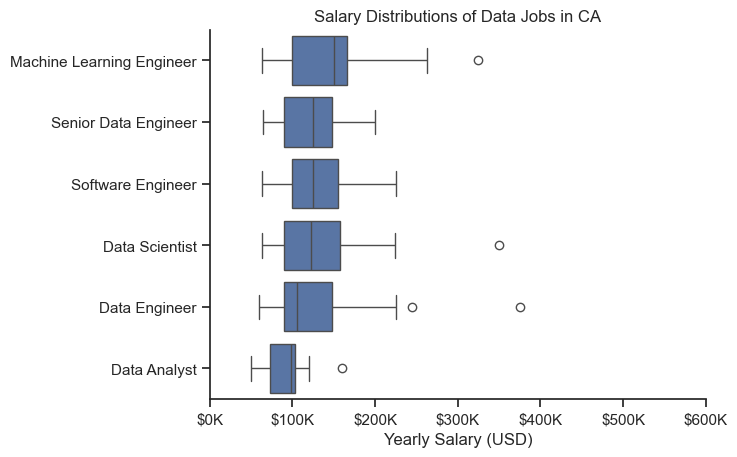

In [10]:
sns.boxplot(data=df_CA_top6, x='salary_year_avg', y='job_title_short', order=job_order)
sns.set_theme(style='ticks')
sns.despine()

# this is all the same
plt.title('Salary Distributions of Data Jobs in CA')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 600000) 
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()

In [11]:
# Only get data analyst jobs in CA
df_DA_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_CA = df_DA_CA.dropna(subset=['salary_year_avg'])

df_DA_CA = df_DA_CA.explode('job_skills')

df_DA_CA[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
48811,105000.0,sql
48811,105000.0,python
48811,105000.0,javascript
48811,105000.0,bigquery
48811,105000.0,tableau


In [12]:
df_DA_top_pay = df_DA_CA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

df_DA_top_pay

,count,median
job_skills,,
looker,2,130250.00
redshift,1,120000.00
snowflake,3,120000.00
hadoop,3,111175.00
spark,4,109795.25
typescript,1,108415.50
aws,2,105000.00
bigquery,3,105000.00
gcp,2,105000.00


In [13]:
df_DA_skills = df_DA_CA.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)

df_DA_skills

,count,median
job_skills,,
snowflake,3,120000.00
spark,4,109795.25
python,14,99825.00
sheets,4,99500.00
sql,17,99150.00
tableau,10,98825.00
excel,9,98500.00
sas,8,98500.00
vba,4,84500.00


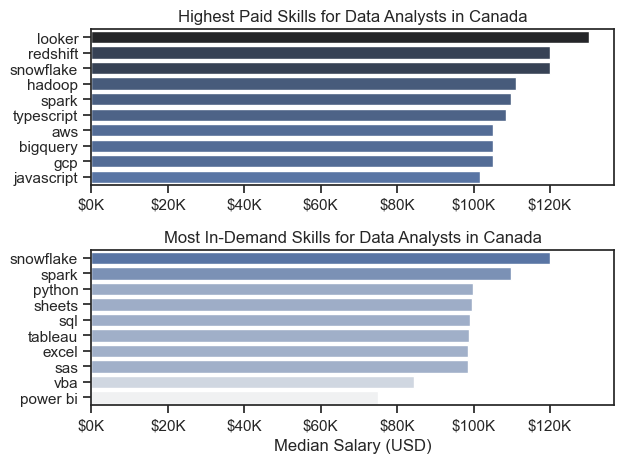

In [15]:
fig, ax = plt.subplots(2, 1)  

# Top 10 Highest Paid Skills for Data Analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, hue='median', ax=ax[0], palette='dark:b_r')
ax[0].legend().remove()
# original code:
# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) 
ax[0].set_title('Highest Paid Skills for Data Analysts in Canada')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))


# Top 10 Most In-Demand Skills for Data Analysts')
sns.barplot(data=df_DA_skills, x='median', y=df_DA_skills.index, hue='median', ax=ax[1], palette='light:b')
ax[1].legend().remove()
# original code:
# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Most In-Demand Skills for Data Analysts in Canada')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())  # Set the same x-axis limits as the first plot
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

sns.set_theme(style='ticks')
plt.tight_layout()
plt.show()
